# **E-commerce Sales Data Analysis**

**Objective:**  
To analyze sales and profit performance across
 and regions using Python.

**Tools Used:**  
Python, Pandas, NumPy, Matplotlib


# Day 1 - Data Loading & Understanding

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Loading

In this step, the dataset is loaded using Pandas to begin exploratory analysis.


In [252]:
from google.colab import files
uploaded = files.upload()

Saving ecommerce_sales_data.csv to ecommerce_sales_data (3).csv


In [253]:
df = pd.read_csv('ecommerce_sales_data.csv')

## 2. Data Overview

This section helps understand the structure of the dataset, including number of rows,
columns, data types, and presence of missing values.


In [254]:
print(df.head(2),"\n")
print(df.info(), "\n")
print(df.shape)

   Order Date Product Name     Category Region  Quantity  Sales  Profit
0  2024-12-31      Printer       Office  North         4   3640  348.93
1  2022-11-27        Mouse  Accessories   East         7   1197  106.53 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB
None 

(3500, 7)


### Observations:
- The dataset contains 3500 rows and 7 columns.
- Order Date is currently in object format.
- Numerical columns include Sales, Profit, and Quantity.


## 3. Date Conversion

The Order Date column is converted to datetime format to enable time-based analysis
such as monthly and yearly trends.


In [255]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [256]:
df.dtypes

,0
Order Date,datetime64[ns]
Product Name,object
Category,object
Region,object
Quantity,int64
Sales,int64
Profit,float64


Order Date converted to datetime for time-based analysis.

## 4. Data Quality Checks

This step checks for missing values and duplicate records to ensure data accuracy.


In [257]:
df.isnull().sum()

,0
Order Date,0
Product Name,0
Category,0
Region,0
Quantity,0
Sales,0
Profit,0


In [258]:
df.duplicated().sum()

np.int64(0)

In [259]:
df.drop_duplicates(inplace=True)


### Cleaning Decisions:
- No missing values found / Missing values handled.
- No Duplicate records found


## 5. Business Analysis

This section answers key business questions using aggregated data.


### Q1. What is the total sales, profit, and quantity sold?


In [260]:
df[['Sales', 'Profit', 'Quantity']].sum()

,0
Sales,10667881.00
Profit,1844665.21
Quantity,17261.00


**Insight:**  
Total sales: 10667881.00

Total profit: 1844665.21

Total Quantity Sold: 17261.00

## 6. Visualization

A bar chart is used to compare total sales across different product categories.


### Sales By Category

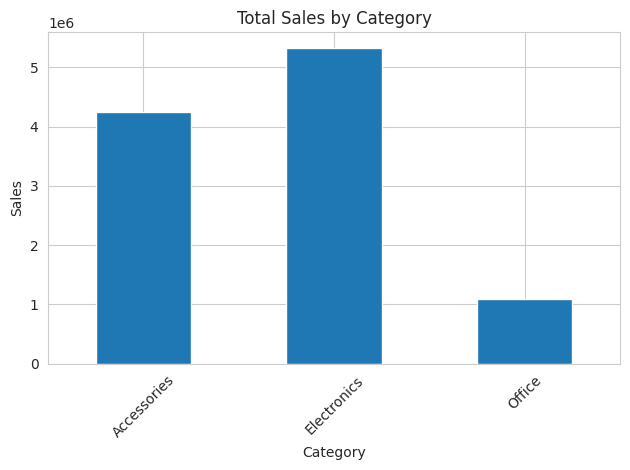

In [261]:
df.groupby('Category')['Sales'].sum().plot(kind='bar')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**  
The Electronics category contributes the highest sales, indicating strong customer demand.


### Profit by Region

Text(0.5, 1.0, 'Profit By Region')

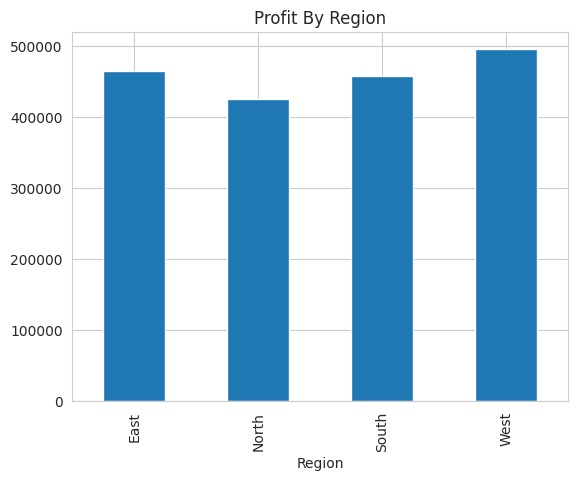

In [262]:
df.groupby('Region')['Profit'].sum().plot(kind='bar')
plt.title('Profit By Region')

Region **WEST** contributes the highest profit.

## Day 1 Summary

- Loaded and explored the dataset
- Converted Order Date for time analysis
- Analyzed sales and profit by category and region
- Created initial visualization with insights


# Day 2 - Exploratory Data Analysis

## Turn raw data into time-based insights and profitability analysis.
## 7. Feature Engineering: Time Variables

To analyze trends over time, new time-based features are extracted from Order Date.


In [263]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [264]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()

In [265]:
df[['Order Date', 'Year', 'Month', 'Month_Name']].head(5)

,Order Date,Year,Month,Month_Name
0,2024-12-31,2024,12,December
1,2022-11-27,2022,11,November
2,2022-05-11,2022,5,May
3,2024-03-16,2024,3,March
4,2022-09-10,2022,9,September


## 8. Monthly Sales and Profit Trend

This analysis helps understand seasonal patterns and overall business growth.


In [266]:
monthly_trend = df.groupby(['Year', 'Month'])[['Sales', 'Profit']].sum().reset_index()
monthly_trend.head()


,Year,Month,Sales,Profit
0,2022,1,341544,63827.33
1,2022,2,208775,34084.90
2,2022,3,294660,51931.81
3,2022,4,230624,44260.45
4,2022,5,314295,53504.97


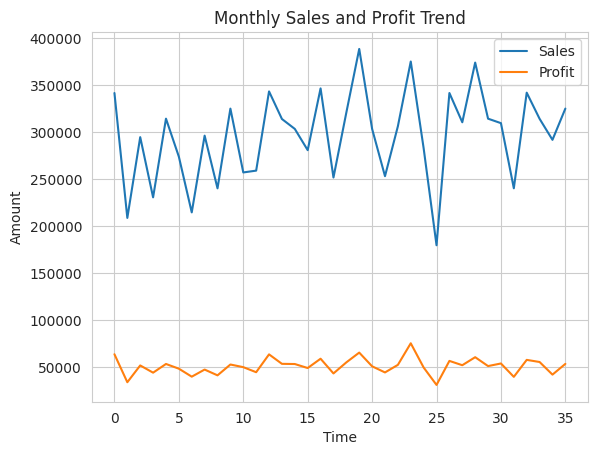

In [267]:
plt.figure()
plt.plot(monthly_trend['Sales'], label='Sales',)
plt.plot(monthly_trend['Profit'], label='Profit',)
plt.title("Monthly Sales and Profit Trend")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()
plt.show()

## 9. Profitability Analysis by Category


In [268]:
category_profit=df.groupby('Category')['Profit'].sum().sort_values()
category_profit

,Profit
Category,
Office,185394.88
Accessories,736084.74
Electronics,923185.59


(array([0, 1, 2]),
 [Text(0, 0, 'Office'), Text(1, 0, 'Accessories'), Text(2, 0, 'Electronics')])

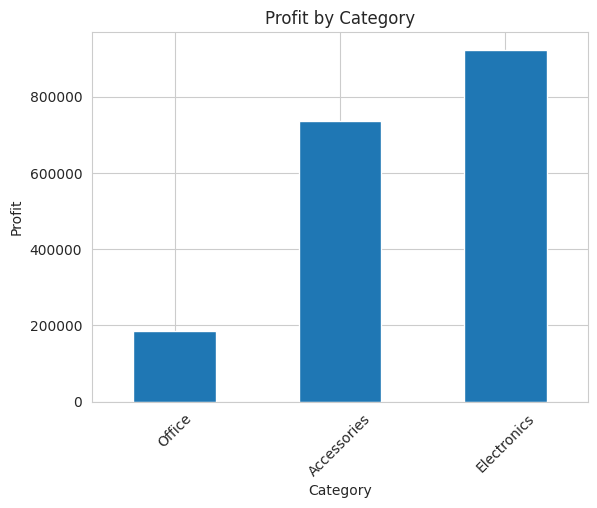

In [269]:
category_profit.plot(kind='bar')
plt.title("Profit by Category")
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)

**Insight:**  
The **office** category shows lowest profit and may require cost optimization or pricing review.


## 10. Loss-Making Products


In [270]:
df.groupby('Product Name')['Profit'].sum().sort_values().head(10)

,Profit
Product Name,
Tablet,167505.01
Headphones,172478.20
Keyboard,175814.68
Smartwatch,178995.81
Smartphone,183296.97
Printer,185394.88
Laptop,185756.81
Mouse,185763.69
Monitor,202028.17


**Insight:**  
Certain products consistently generate losses, indicating potential issues in pricing, discounts, or logistics.


## 11. Profit Margin Analysis

Profit margin helps understand profitability relative to sales.


In [271]:
df['Profit_Margin']=(df['Profit']/df['Sales'])*100
df[['Sales', 'Profit', 'Profit_Margin']]

,Sales,Profit,Profit_Margin
0,3640,348.93,9.585989
1,1197,106.53,8.899749
2,5865,502.73,8.571697
3,786,202.87,25.810433
4,509,103.28,20.290766
...,...,...,...
3495,4064,771.16,18.975394
3496,1117,119.89,10.733214
3497,260,66.02,25.392308
3498,222,50.28,22.648649


Average Profit Margin by Category

In [272]:
df.groupby('Category')['Profit_Margin'].mean().sort_values()

,Profit_Margin
Category,
Office,17.283871
Accessories,17.333274
Electronics,17.417026


**Insight:**  
The highest average profit margin is observed in the **Electronics** category.


## Day 2 Summary

- Extracted time-based features from Order Date
- Analyzed monthly sales and profit trends
- Identified loss-making categories and products
- Calculated and compared profit margins across categories


# Day 3 – Feature Engineering & Cleaning

## Column Understanding
- Order Date: datetime642: Date when order was placed
- Product Name: object: Name of the product
- Category: object: Product category
- Region: object: Sales region
- Quantity: int64: Number of items sold
- Sales: int64: Revenue generated
- Profit: float64: Profit earned

### Business Logic Checks
- Are there orders with negative or zero sales?
- Are there orders with zero quantity?
- Are there high sales but negative profit?


In [273]:
print(df[df['Sales'] <= 0])
print(df[df['Quantity'] <= 0])
print(df[df['Profit'] < 0])


Empty DataFrame
Columns: [Order Date, Product Name, Category, Region, Quantity, Sales, Profit, Year, Month, Month_Name, Profit_Margin]
Index: []
Empty DataFrame
Columns: [Order Date, Product Name, Category, Region, Quantity, Sales, Profit, Year, Month, Month_Name, Profit_Margin]
Index: []
Empty DataFrame
Columns: [Order Date, Product Name, Category, Region, Quantity, Sales, Profit, Year, Month, Month_Name, Profit_Margin]
Index: []


## Outlier analysis

In [274]:
df[['Sales', 'Quantity', 'Profit']].quantile([0.01, 0.25, 0.75, 0.99])

,Sales,Quantity,Profit
0.01,121.98,1.0,16.4676
0.25,1049.50,3.0,158.6950
0.75,4537.00,7.0,729.1250
0.99,9765.18,9.0,2210.3585


In [275]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1


Extreme sales values were observed. Outliers were retained
as they may represent bulk or corporate orders.


## Feature engineering

In [276]:
df['Order_Quarter'] = df['Order Date'].dt.quarter
df['Sales_per_Unit'] = df['Sales'] / df['Quantity']
df['Is_Profitable'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)


### Feature Engineering Rationale
- Sales_per_Unit helps compare pricing efficiency
- Is_Profitable simplifies profit-based analysis


## Aggregated datasets

In [277]:
region_summary = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()


In [278]:
category_summary = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()


Aggregated datasets were created to analyze performance
by region and category.


## Save cleaned & prepared data

In [293]:
df.to_csv('cleaned_sales_data.csv', index=False)

In [305]:
df_cleaned = pd.read_csv('cleaned_sales_data.csv')
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])

In [306]:
region_summary.to_csv('region_summary.csv', index=False)


## Day 3 Summary
- Performed business logic validation
- Analyzed outliers and extreme values
- Created advanced business features
- Generated aggregated datasets for EDA
- Prepared final cleaned dataset for visualization


# Day 4 – Visualization & Business Insights

## Objective
- Identify sales and profit trends
- Analyze performance by region and category
- Discover loss-making segments
- Generate actionable business insights


## Import Libraries (Code)

In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


## Load Cleaned Dataset (Code)

In [334]:
df = pd.read_csv('cleaned_sales_data.csv')



dtype('O')

## Sales Trend Over Time

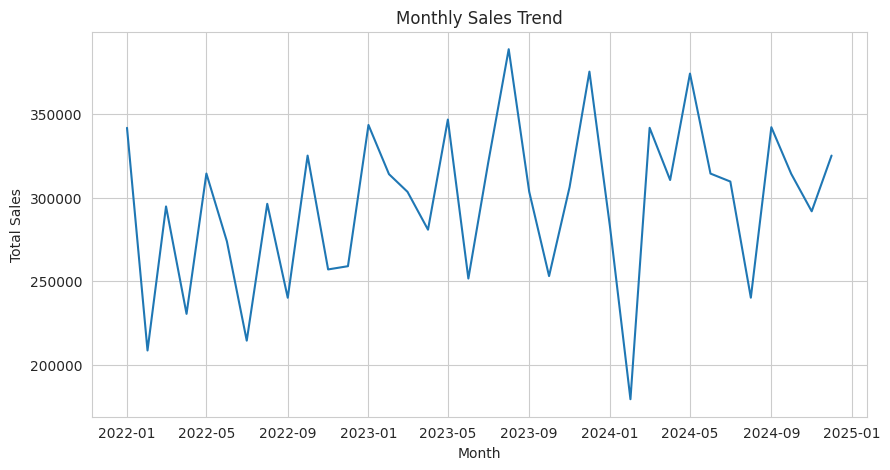

In [309]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


### Insight
Sales show seasonal fluctuations with noticeable peaks
during certain months, indicating demand cycles.


## Profit Trend Analysis

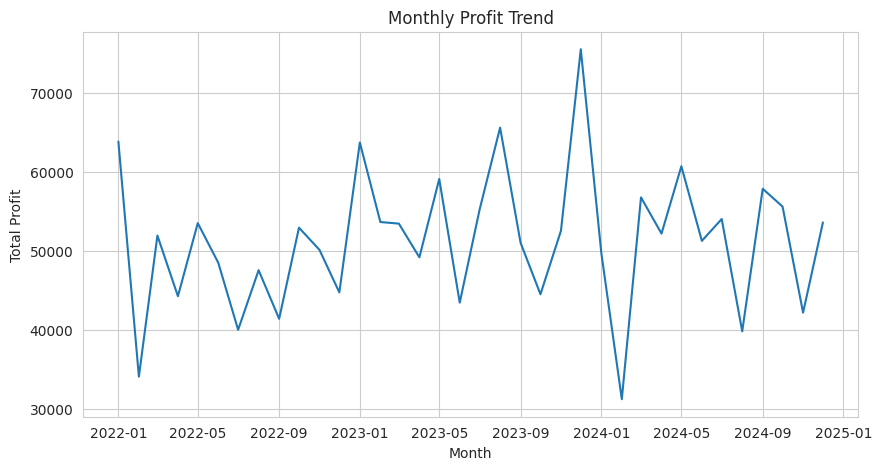

In [310]:
monthly_profit = df.groupby(df['Order Date'].dt.to_period('M'))['Profit'].sum()
monthly_profit.index = monthly_profit.index.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(monthly_profit.index, monthly_profit.values)
plt.title('Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.show()


### Insight
Profit does not always follow sales trends, suggesting
pricing or cost issues in some periods.


## Region-wise Performance

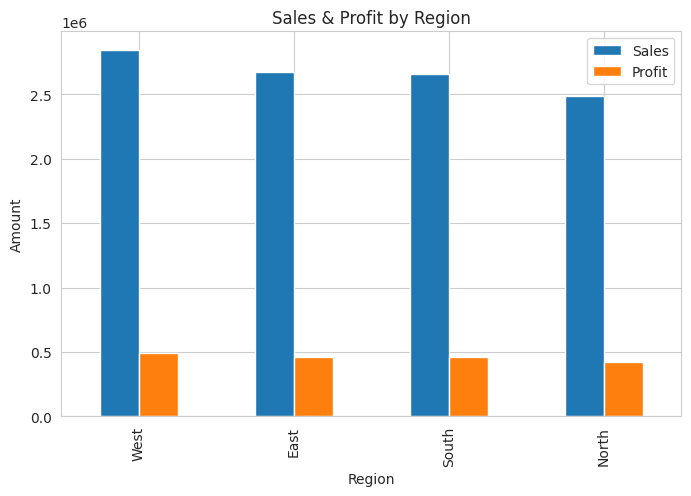

In [311]:
region_summary = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Sales', ascending=False)

region_summary.plot(kind='bar', figsize=(8,5))
plt.title('Sales & Profit by Region')
plt.ylabel('Amount')
plt.show()


### Insight
Certain regions generate high sales but comparatively
lower profit, indicating operational inefficiencies.


## Category-wise Analysis

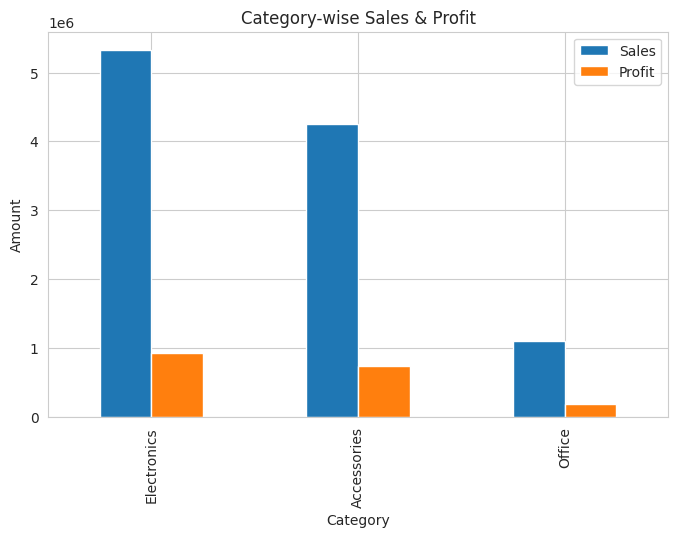

In [312]:
category_summary = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Sales', ascending=False)

category_summary.plot(kind='bar', figsize=(8,5))
plt.title('Category-wise Sales & Profit')
plt.ylabel('Amount')
plt.show()


### Insight
Some categories are high in revenue but low in profitability,
highlighting the need for margin optimization.


## Loss-Making Analysis

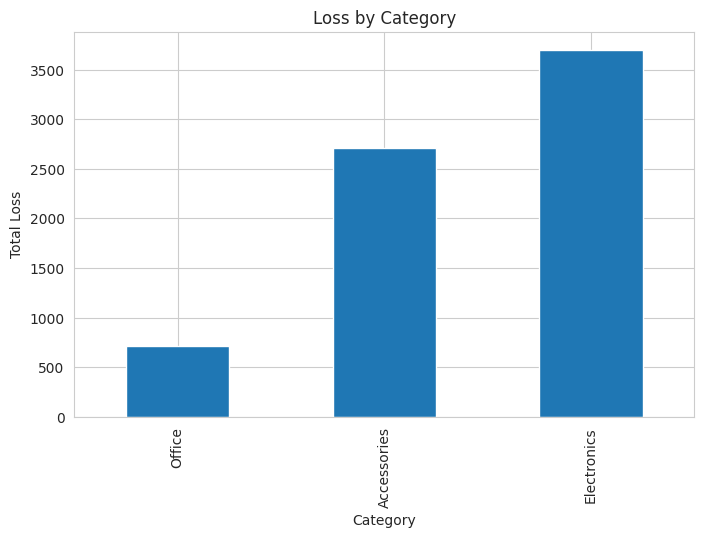

In [314]:
loss_df = df[df['Profit'] < 50]
loss_df.groupby('Category')['Profit'].sum().sort_values().plot(kind='bar', figsize=(8,5), title='Loss by Category')
plt.ylabel('Total Loss')
plt.show()


### Insight
A small number of categories contribute disproportionately
to overall losses and should be reviewed.


## Profitability Ratio Analysis

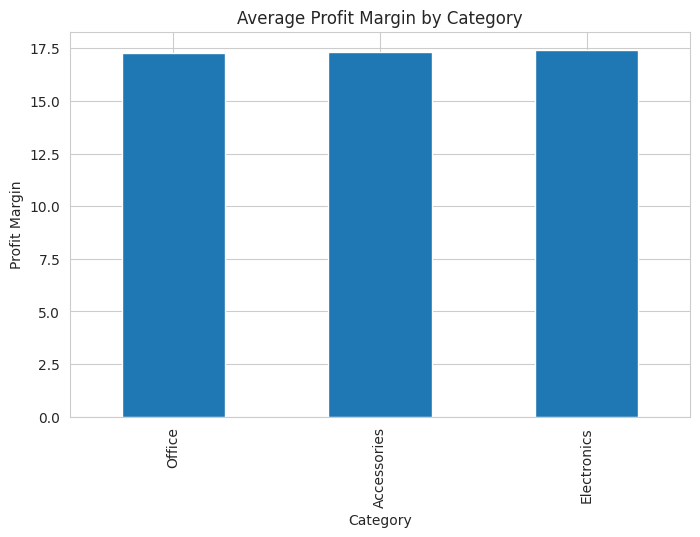

In [315]:
profit_margin = df.groupby('Category')['Profit_Margin'].mean().sort_values()

profit_margin.plot(kind='bar', figsize=(8,5))
plt.title('Average Profit Margin by Category')
plt.ylabel('Profit Margin')
plt.show()


### Insight
Categories with low average profit margin may require
pricing or cost-structure adjustments.


## Key Insights from EDA
- Sales exhibit seasonal trends
- High revenue does not always translate to high profit
- Certain regions and categories drive most losses
- Profit margin analysis reveals pricing inefficiencies


## Day 4 Summary
- Conducted exploratory data analysis
- Identified sales and profit trends
- Analyzed performance by region and category
- Highlighted loss-making segments
- Derived actionable business insights


# Day 5: SQL Analysis & Dashboard Preparation

## Objective
- Translate business questions into SQL queries
- Define key performance indicators (KPIs)
- Create dashboard-ready aggregated tables

## Business Questions
1. What is the total sales and profit by region?
2. Which categories are most profitable?
3. Which products are loss-making?
4. How do sales trend month over month?
5. What percentage of orders are profitable?

In [329]:
import pandas as pd

df = pd.read_csv('/content/cleaned_sales_data.csv')

,Order Date
0,2024-12-31
1,2022-11-27
2,2022-05-11
3,2024-03-16
4,2022-09-10
...,...
3495,2023-02-15
3496,2022-09-18
3497,2022-04-12
3498,2022-01-18


### 1. What is the total sales and profit by region?

<Axes: xlabel='Region'>

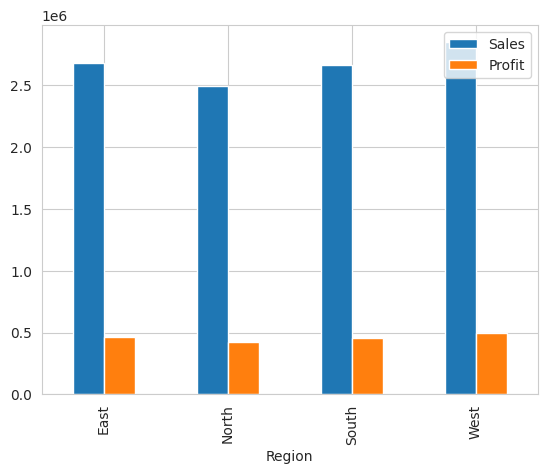

In [317]:
df.groupby('Region')[['Sales', 'Profit']].sum().plot(kind='bar')

### 2. Which categories are most profitable?

In [318]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

,Profit
Category,
Electronics,923185.59
Accessories,736084.74
Office,185394.88


### 3. Which products are loss-making?

In [319]:
df.groupby('Product Name')['Profit'].sum().sort_values()

,Profit
Product Name,
Tablet,167505.01
Headphones,172478.20
Keyboard,175814.68
Smartwatch,178995.81
Smartphone,183296.97
Printer,185394.88
Laptop,185756.81
Mouse,185763.69
Monitor,202028.17


### 4. How do sales trend month over month?

In [335]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

,Sales
Order Date,
2022-01,341544
2022-02,208775
2022-03,294660
2022-04,230624
2022-05,314295
2022-06,273851
2022-07,214627
2022-08,296242
2022-09,240211


### 5. What percentage of orders are profitable

In [336]:
(df['Profit'] > 0).mean() * 100

np.float64(100.0)

## Key Performance Indicators (KPIs)
- Total Sales
- Total Profit
- Profit Margin
- Monthly Sales Growth
- % Profitable Orders


In [337]:
dashboard_region = df.groupby('Region').agg({
    'Sales':'sum',
    'Profit':'sum',
    'Quantity':'sum'
}).reset_index()

dashboard_month = df.groupby(df['Order Date'].dt.to_period('M')).agg({
    'Sales':'sum',
    'Profit':'sum'
}).reset_index()

In [338]:
dashboard_region.to_csv('dashboard_region.csv', index=False)
dashboard_month.to_csv('dashboard_month.csv', index=False)

## Dashboard Layout Plan
- KPI Cards: Total Sales, Total Profit, Profit Margin
- Line Chart: Monthly Sales & Profit Trend
- Bar Chart: Sales by Region
- Bar Chart: Profit by Category
- Table: Top Loss-Making Products


## Day 5 Summary
- Converted analysis into SQL-style queries
- Answered key business questions
- Defined KPIs for decision-making
- Created dashboard-ready datasets
